# Vector

In [1]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video.size

4

(2, 3)
(5, 1)


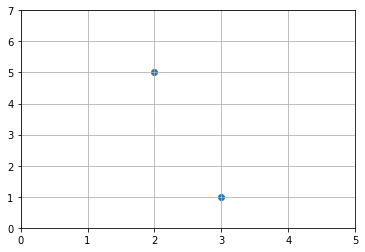

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])
x_coords, y_coords = zip(u, v)
print(x_coords)
print(y_coords)
plt.scatter(x_coords, y_coords)
plt.axis([0, 5, 0, 7])
plt.grid()
plt.show()

## Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [7]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

## Dot product
### Definition
The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### In python
The dot product is pretty simple to implement:

In [20]:


ang1 = np.arctan(u[0]/u[1])
print('Angle 1:', np.degrees(ang1))
ang2 = np.arctan(v[0]/v[1])
print('Angle 2:', np.degrees(ang2))

print('Manual Calc:', LA.norm(u) * LA.norm(v) * np.cos(ang2 - ang1))

print('Built-in:', u.dot(v))

Angle 1: 21.80140948635181
Angle 2: 71.56505117707799
Manual Calc: 11.000000000000002
Built-in: 11


### Calculating the angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [27]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.868539395286 radians
      = 49.7636416907 degrees


### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


In [24]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized
print(proj)

[0.75862069 1.89655172]
